# Word Vectors Gone Wrong: Fixing Gender Stereotypes in Language Models

## Problem Description

Language models process words as arrays of numbers, called word vectors (or word embeddings). These vectors are created based on the usage of the words in context, so they capture the distributional properties of words. Word vectors can be conceptualized as unique coordinates in a multi-dimensional space, with the distance between them capturing the semantic and syntactic relations between words.

In a seminal [article](https://aclanthology.org/P16-1158/) Ekaterina Vylomova and colleagues show that word vectors trained on English data exhibit a curious property: the spatial difference between the vectors of 'king' and 'queen' is the same as the difference between the vectors of 'man' and 'woman'. This difference essentially captures **gender**. Similarly, the difference between 'king' and 'man' is the same as that between 'queen' and 'woman', capturing the notion of royalty.

The way gender is reflected in word vectors has received special attention in NLP, because while sometimes word vectors capture true gender roles (e.g. a king is by definition male), other times they capture undesirable societal biases, e.g. they place 'engineer' and 'man' in the same relationship as 'housekeeper' and 'woman'. This does not seem fair, given that professions such as engineer or housekeeper should be non-gender specific.

We don't want to have models that promote stereotypes about which jobs are suitable for men or women, so we should find a way to fix this problem. The tasks presented in this notebook will guide you to one possible solution.

## Technical Specifications

All team solutions should be submitted as a modified and compiled copy of this base notebook. You also need to provide a file of the word vectors you created.

The notebook contains specific tasks you need to accomplish and provides code when necessary. Some cells, marked with the `###DO NOT CHANGE THIS CELL###` comment, have to remain as they are. Other cells can be changed, especially the ones saying `###YOUR CODE GOES HERE###` should be changed to complete the tasks.


Your goal is to get familiar with word vectors and the problem of bias which is a common issue in Artificial Intelligence applications.

## Resources

You can read more on gender bias in word vectors in the paper [Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings](https://proceedings.neurips.cc/paper_files/paper/2016/file/a486cd07e4ac3d270571622f4f316ec5-Paper.pdf) by Tolga Bolukbasi, Kai-Wei Chang, James Zou, Venkatesh Saligrama, and Adam Kalai. Proceedings of NIPS 2016.

There are some articles/tutorials online that explain the main concepts of the paper (neutralization and equalization of word vectors) such as [Debiasing Word Embeddings with Geometry](https://medium.com/@mihird97/debiasing-word-embeddings-with-geometry-d2c471ab4ae6).





## Task 1: Get familiar with word vectors

To get familiar with word vectors you can visualize each word as a unique coordinate in a multi-dimensional space, and the distance and direction between them reveal the linguistic connections. For this task You are given some synthetic word vectors as points in a coordinate space (x, y).

🎯 The goal is to move the biased points (cleaning, driving) in the graph so that the bias of the vectors is neutralized. Make a graph with as little changes as possible.

Deliverables: A new graph where the non-gender specific words, 'cleaning' and 'driving', are equally distant to 'mother' and 'father'.

**Answer 1**

Your answer goes here.


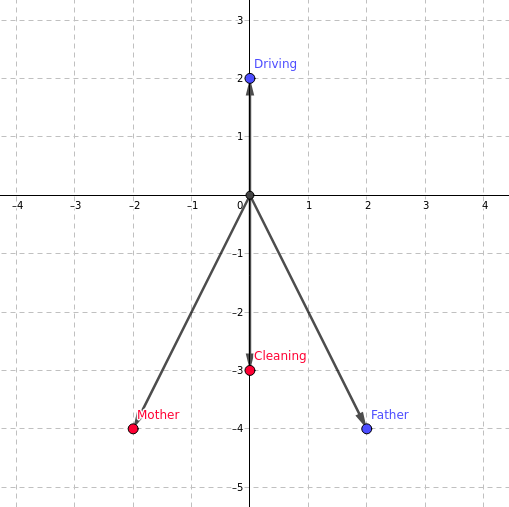

In [ ]:
def word_to_vec_map(word):
    word_vectors = {
        "man": np.array([1, 0, 0]),
        "woman": np.array([-1, 0, 0]),
        "king": np.array([1, 1, 0]),
        "queen": np.array([-1, 1, 0]),
        "boy": np.array([1, -1, 0]),
        "girl": np.array([-1, -1, 0]),
        "father": np.array([1, 0, 1]),
        "mother": np.array([-1, 0, 1]),
        "doctor": np.array([0.5, 1, 1]),
        "nurse": np.array([0, 1, 1]),
        "engineer": np.array([0.5, 1, -1]),
        "teacher": np.array([0, 1, -1]),
        "programmer": np.array([0.5, 1, -0.5]),
        "homemaker": np.array([-0.5, -1, 1]),
        "businessman": np.array([0.5, 1, 0.5]),
        "businesswoman": np.array([-0.5, 1, 0.5]),
    }
    return word_vectors.get(word.lower(), np.zeros(3))

## Task 2 - Implement Similarity Metrics

We can measure how similar are two words using cosine similarity. We would expect non-gender specific words to be equally distant from gender specific words.

There are other ways to measure similarity apart from cosine distance, like Levenshtein or Eucledean distance.

🎯 The goal is to get familiar with calculating various similarity methods using python and try to find similar words that are an example of bias and unbiased vectors.

Deliverables: Provide code for implementing a different distance metric in Python. Run the example words, and try measuring the distance of different words. Can you find a biased and an unbiased example? Compare it with your implementation of cosine distance. Does using a different distance metric affect the biased and unbiased examples?


To calculate cosine similarity, we need to take the cosine of the angle between these two vectors. Here are the steps:

1. Calculate the dot product of A and B
   - Multiply each element in A with the corresponding element in B
   - Sum all those products
   - Call this dot_product

2. Calculate the magnitudes (or lengths) of A and B
   - Square each element in A, sum them, and take the square root. Let's call this mag_A.
   - Do the same for B. Let's call this mag_B.

3. Compute cosine similarity:
   cosine_similarity = dot_product / (mag_A * mag_B)

The closer this value is to 1, the smaller the angle and the more similar document A is to document B.

Thanks to Python, you do not need to do these time-consuming calculations manually! Especially for step 1 and step 2, there is a library called 'numpy' with functions that can help you implement cosine distance in Python!

In [ ]:

def cosine_similarity(u, v):
    if np.all(u == 0) or np.all(v == 0):
        return 0  # Return 0 similarity for zero vectors
    dot = np.dot(u, v)
    norm_u = np.linalg.norm(u)
    norm_v = np.linalg.norm(v)
    return dot / (norm_u * norm_v)

def euclidean_distance(u, v):
    return np.linalg.norm(u - v)


In [ ]:
def compare_words(word1, word2):
    vec1 = word_to_vec_map(word1)
    vec2 = word_to_vec_map(word2)

    cos_sim = cosine_similarity(vec1, vec2)
    euc_dist = euclidean_distance(vec1, vec2)

    print(f"Cosine similarity between {word1} and {word2}: {cos_sim:.4f}")
    print(f"Euclidean distance between {word1} and {word2}: {euc_dist:.4f}")
    print()

# Biased examples
compare_words("man", "engineer")
compare_words("woman", "engineer")
compare_words("man", "nurse")
compare_words("woman", "nurse")

# Unbiased examples
compare_words("cat", "pet")
compare_words("dog", "pet")

# Additional comparisons
compare_words("man", "woman")
compare_words("father", "mother")
compare_words("cleaning", "driving")

Cosine similarity between man and engineer: 0.8321
Euclidean distance between man and engineer: 1.1180

Cosine similarity between woman and engineer: -0.8321
Euclidean distance between woman and engineer: 2.6926

Cosine similarity between man and nurse: -0.4472
Euclidean distance between man and nurse: 1.8028

Cosine similarity between woman and nurse: 0.4472
Euclidean distance between woman and nurse: 1.1180

Cosine similarity between cat and pet: 1.0000
Euclidean distance between cat and pet: 0.1000

Cosine similarity between dog and pet: 1.0000
Euclidean distance between dog and pet: 0.1000

Cosine similarity between man and woman: -1.0000
Euclidean distance between man and woman: 2.0000

Cosine similarity between father and mother: 0.6000
Euclidean distance between father and mother: 4.0000

Cosine similarity between cleaning and driving: -1.0000
Euclidean distance between cleaning and driving: 5.0000



## Task 3: Get familiar with Word Analogy task

Word analogy can be used as a task to detect bias in word vectors. In a word analogy task, we complete the sentence "a is to b as c is to ____". An example is 'man is to woman as king is to queen'. A biased example would be a 'man is to engineer as woman is to
homemaker'.


In detail, we are trying to find a word, such that the associated word vectors v1, v2, v3, v4 are related in the following manner: v2-v1 ~= v4-v3. We will measure the similarity between v2-v1 and v4-v3 using cosine similarity.

🎯 The goal is to get familiar with the word analogy task and provide examples. You should use the read_glove_vecs and cosine_similarity functions from the previous exercises.


Deliverables: Provide 2 examples of analogy pairs that can be considered gender bias and the algorithm doesn't give an expected answer, and 2 examples where the analogy is correct.



This is the code for computing word analogy given three words (word_a, word_b, word_c), or for example ('man', 'father', 'woman'), the following code find the word vector of a word that completes the analogy. In this example the word vector we expect is 'mother'.

In [ ]:
def cosine_similarity(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))


def complete_analogy(word_a, word_b, word_c, word_to_vec_map):
    word_vectors = word_to_vec_map('')  # Get the entire dictionary of word vectors
    words = word_vectors.keys()
    max_cosine_sim = -100
    best_word = None

    word_a, word_b, word_c = word_a.lower(), word_b.lower(), word_c.lower()

    e_a, e_b, e_c = word_vectors[word_a], word_vectors[word_b], word_vectors[word_c]

    for w in words:
        if w in [word_a, word_b, word_c]:
            continue

        e_w = word_vectors[w]
        cosine_sim = cosine_similarity(e_b - e_a, e_w - e_c)

        if cosine_sim > max_cosine_sim:
            max_cosine_sim = cosine_sim
            best_word = w

    return best_word

def word_to_vec_map(word):
    word_vectors = {
        "man": np.array([1, 0, 0]),
        "woman": np.array([-1, 0, 0]),
        "king": np.array([1, 1, 0]),
        "queen": np.array([-1, 1, 0]),
        "boy": np.array([1, -1, 0]),
        "girl": np.array([-1, -1, 0]),
        "father": np.array([1, 0, 1]),
        "mother": np.array([-1, 0, 1]),
        "doctor": np.array([0.5, 1, 1]),
        "nurse": np.array([0, 1, 1]),
        "engineer": np.array([0.5, 1, -1]),
        "teacher": np.array([0, 1, -1]),
        "programmer": np.array([0.5, 1, -0.5]),
        "homemaker": np.array([-0.5, -1, 1]),
        "businessman": np.array([0.5, 1, 0.5]),
        "businesswoman": np.array([-0.5, 1, 0.5]),
    }
    if word == '':
        return word_vectors
    return word_vectors.get(word.lower(), np.zeros(3))

Here is an example of how we could use the code above:

In [ ]:
triads_to_try = [('man', 'father', 'woman'), ('man', 'doctor', 'woman'), ('father', 'businessman', 'mother'), ('man', 'engineer', 'woman')]
for triad in triads_to_try:
    print ('{} -> {} :: {} -> {}'.format( *triad, complete_analogy(*triad,word_to_vec_map)))

man -> father :: woman -> mother
man -> doctor :: woman -> businesswoman
father -> businessman :: mother -> queen
man -> engineer :: woman -> queen


As part of this task you need to find some other analogy pairs that do work, but also find some where the algorithm doesn't give the right answer.

In [ ]:
print("Examples that should work well:")
triads_to_try = [('man', 'king', 'woman'), ('boy', 'man', 'girl'), ('man', 'father', 'woman'), ('king', 'queen', 'man')]
for triad in triads_to_try:
    print('{} -> {} :: {} -> {}'.format(*triad, complete_analogy(*triad, word_to_vec_map)))

print("\nExamples that might show bias:")
triads_to_try = [('man', 'doctor', 'woman'), ('father', 'businessman', 'mother'), ('man', 'engineer', 'woman'), ('man', 'programmer', 'woman')]
for triad in triads_to_try:
    print('{} -> {} :: {} -> {}'.format(*triad, complete_analogy(*triad, word_to_vec_map)))

Examples that should work well:
man -> king :: woman -> queen
boy -> man :: girl -> woman
man -> father :: woman -> mother
king -> queen :: man -> woman

Examples that might show bias:
man -> doctor :: woman -> businesswoman
father -> businessman :: mother -> queen
man -> engineer :: woman -> queen
man -> programmer :: woman -> queen
